In [81]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns


file = open("data_cleaned.csv", "r")
df = pd.read_csv(file, sep = ",")



In [67]:
features = df.loc[:, df.columns != 'team_one_win']

In [95]:


X = features
y = df["team_one_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #30% test

clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) #create gaussian classifier, number of trees is currently arbitrary
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9702267140125649


In [69]:
#Visualizing feature importance distribution

for feature in zip(features, clf.feature_importances_):
    print(feature) #printing name and gini importance of each feature 

    
feature_names = features.columns.tolist() #column names only in a list
gini_imp = clf.feature_importances_.tolist() #gini importances only in a list

print(feature_names[1]) #this confirms that these lists are in proper paired order
print(gini_imp[1])

('duration', 0.005856826053899457)
('team_one_barons', 0.015241048440688432)
('team_two_barons', 0.027449193016205155)
('team_one_dragons', 0.04064184851998642)
('team_two_dragons', 0.049802386208986665)
('team_one_rift_heralds', 0.0015377146134279759)
('team_two_rift_heralds', 0.002861901575366494)
('team_one_first_baron', 0.009535161451775158)
('team_one_first_blood', 0.0006987977046032908)
('team_one_first_dragon', 0.000851088675072316)
('team_one_first_inhibitor', 0.06618176551132572)
('team_one_first_rift_herald', 0.0009802168708594463)
('team_one_first_tower', 0.007032873481121115)
('team_one_assists', 0.030803691395024833)
('team_two_assists', 0.02623066954791548)
('team_one_level', 0.016883275895162878)
('team_two_level', 0.01614890237385014)
('team_one_kills', 0.03491942537229741)
('team_two_kills', 0.06166365710852852)
('team_one_obj_damage', 0.0853127024253031)
('team_two_obj_damage', 0.07806464059432795)
('team_one_deaths', 0.042685404125743204)
('team_two_deaths', 0.043223

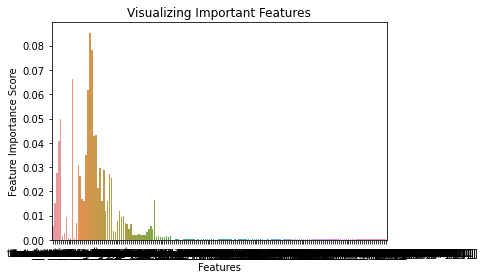

In [70]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_names, y=gini_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()
#we can see that there are a few features that are significantly more valuable than the majority



In [104]:
#identifying valuable features. With 171 features, anything over 1/171 = 0.006 could be said to be better than average, but I will select only those with importance over 0.04 arbitrarily. 
sfm = SelectFromModel(clf, threshold=0.04)
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(feature_names[feature_list_index])


team_two_dragons
team_one_first_inhibitor
team_one_assists
team_two_kills
team_one_obj_damage
team_two_obj_damage
team_one_deaths


In [111]:
#performing a model with only our selected features

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

y_pred = clf.predict(X_test)
print("Full 171 Feature Accuracy: " , metrics.accuracy_score(y_test, y_pred))

y_important_pred = clf_important.predict(X_important_test)
print(" 7 Feature Accuracy: " , metrics.accuracy_score(y_test, y_important_pred))

#with a 96% decrease in features, the model's accuracy is still within 2% of each other

Full 171 Feature Accuracy:  0.9702267140125649
 7 Feature Accuracy:  0.9519257033597378
